### ADVANCED STATISTICS FOR PHYSICS ANALYSIS, Physics of Data
###  Student: Matteo Guida 
### ID Number: 1211201

# Sheet 7

## Exercise 1

In [1]:
# Data from the book
data = c(4.73,  0.45, -1.73, 1.09,  2.19,  0.12,
        1.31,  1.00,  1.32,  1.07,  0.86, -0.49, -2.59,  1.73,  2.11,
        1.61,  4.98,  1.71,  2.23,-57.20,  0.96,  1.25, -1.56,  2.45,
        1.19,  2.17,-10.66,  1.91, -4.16,  1.92,  0.10,  1.98, -2.51,
        5.55, -0.47,  1.91,  0.95, -0.78, -0.84,  1.72, -0.01,  1.48,
        2.70,  1.21,  4.41, -4.79,  1.33,  0.81,  0.20,  1.58,  1.29,
        16.19,  2.75, -2.38, -1.79, 6.50,-18.53,  0.72,  0.94,  3.64,
        1.94, -0.11,  1.57,  0.57)
data.points=c(3,5,7,10,40,64)

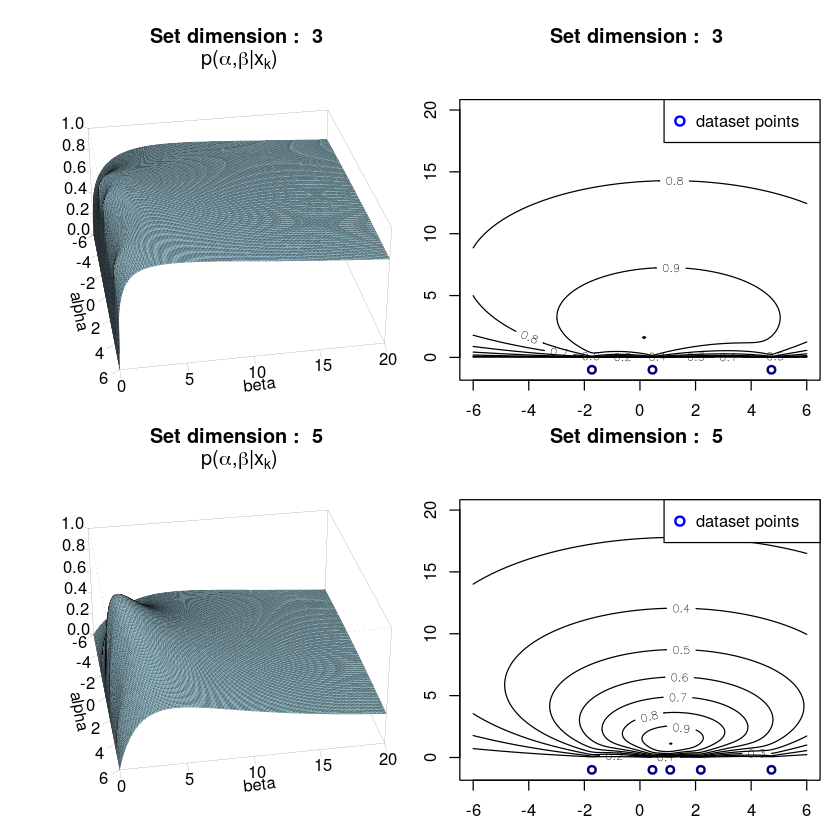

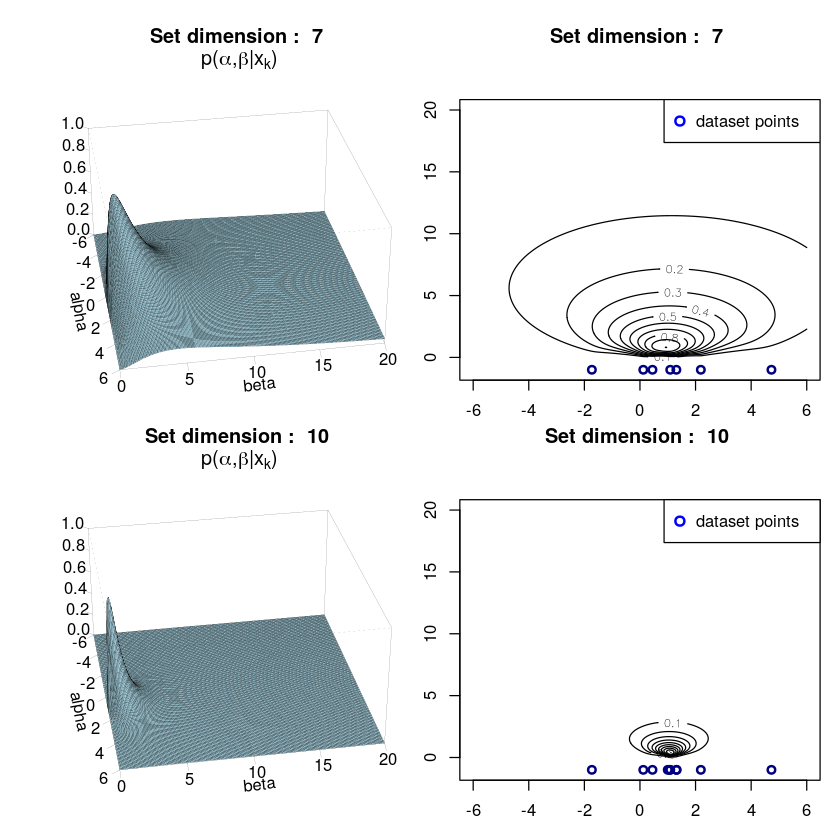

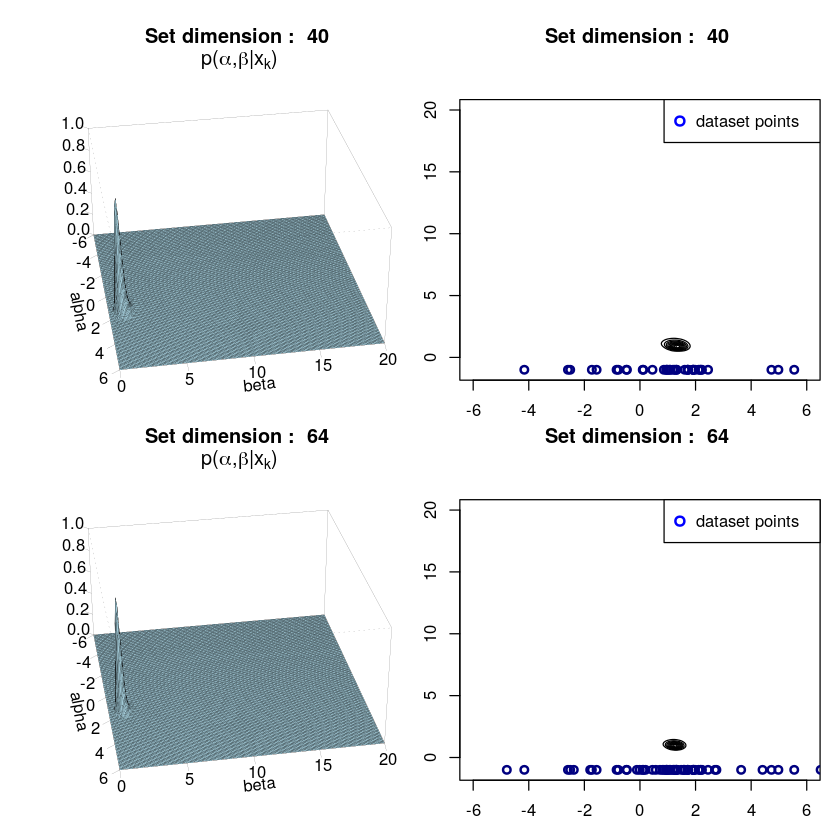

In [2]:
par(mfrow=c(2, 2), oma=c(1, 1, 1, 1), mar=c(2, 2, 4, 0))
for(i in data.points)
{
dt <- data[1:i]
make_log_posterior <- function (data, beta) {
  Vectorize(function (alpha_hat) {
              sum( log((beta/pi) / (beta^2 + (data
                                              - alpha_hat)^2)) )
           })
}
log_posterior <- make_log_posterior(dt, 30)

posterior_shape <- function(xs, log_posterior) {
  log_alphas    <- log_posterior(xs)       
  log_alpha_max <- max(log_alphas)            
  alphas <- exp(log_alphas - log_alpha_max) 
  alphas                                
}

log_joint_posterior <- function (data, alfa, beta) {
  sum( log((beta/pi) / (beta^2 + (data - alfa)^2)) )
}

x_min <- -6; x_max <- 6; y_max <- 20
alphas <- seq(x_min, x_max,length.out=200)
betas  <- seq(    0, y_max,length.out=200)

f <- function(a,b) log_joint_posterior(dt, a, b)

log_grid_values <- outer(alphas, betas, Vectorize(f))

grid_values <- matrix(posterior_shape(log_grid_values, log_posterior),
                      nrow=length(alphas), ncol=length(betas))

length(dt)

persp(alphas, betas , grid_values,
      xlab=bquote(alpha), ylab=bquote(beta), zlab="", ,
      main="" , cex=0.7, lwd=0.1  , expand = 0.5,, col="lightblue",
      xlim=c(x_min,x_max), ylim=c(0,y_max), zlim=c(0,1),
      theta=80, phi=30, d=5.0, shade=0.05, ticktype="detailed")
title(paste("Set dimension : ",length(dt),"\n \n"))
title(bquote(paste(p,"(",alpha,",",beta,"|",x[k],")")))
    
contour(alphas, betas, grid_values, xlim=c(-6,6), ylim=c(-1,20),
       xlab="alpha", ylab="beta")
y.band <- (max(betas) - min(betas))*0.05
yt <- rep(-min(betas), i)
points(dt, yt-1, pch=1, col='navy', lwd=2)
title(paste("Set dimension : ",length(dt),"\n \n"))
legend("topright",c("dataset points"), col="blue", pch=1, pt.cex=1.2, pt.lwd=2)    
}

## Exercise 2

In [3]:
#
# Inference of Signal and Background 
# taken from: C. Bailer-Jones, "Practical Bayesian Inference", Cambridge Univ. Press, 2017

# - Generative model
signal <- function(x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

# Define model parameters
x0  <- 0     # Signal peak
w0 <-1      #Signal width
w1 <-c(0.1,0.25,1,2,3)
A.true  <- 2 # Signal amplitude
B.true  <- 1 # Background amplitude
Delta.t <- 5 # Exposure time

# - Generate the observed data
set.seed(205)
xdat <- list()
s.true <- list()
ddat <- list()
for(j in 1:length(w1)){
temp0<-seq(from=-7*w1[j], to=7*w1[j], by=0.5*w1[j])
xdat=c(xdat,temp0)  
temp0<-array(unlist(xdat[(1+29*(j-1)):(29*j)]),dim=c(29))
s.true=c(s.true,signal(temp0, A.true, B.true, x0, w1[j], Delta.t))
temp1<-signal(temp0, A.true, B.true, x0, w1[j], Delta.t)
ddat=c(ddat,rpois(length(temp1), temp1))
}

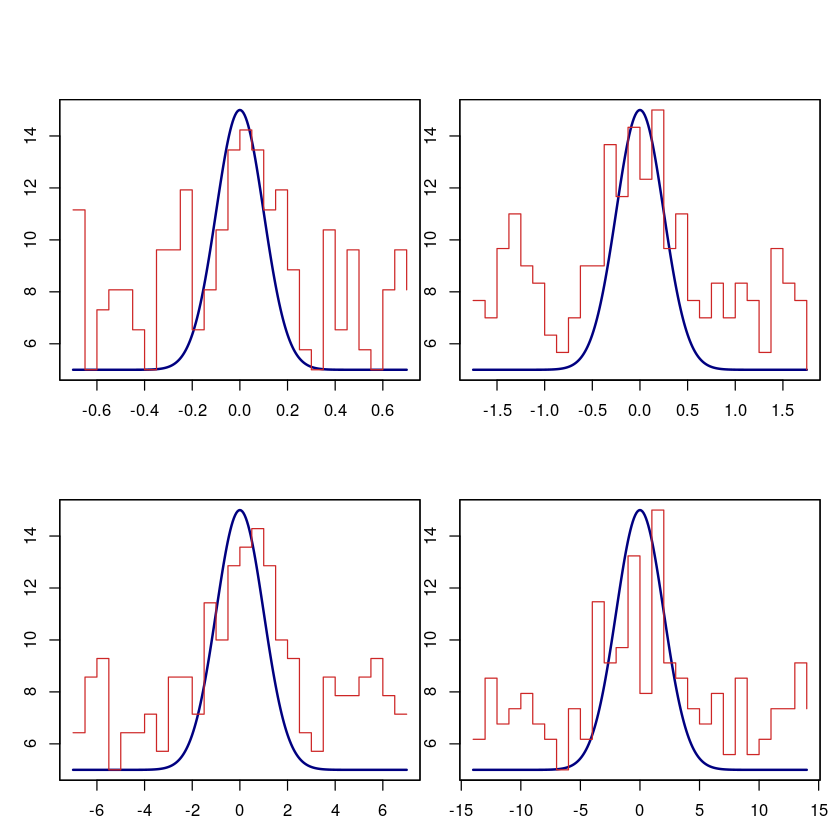

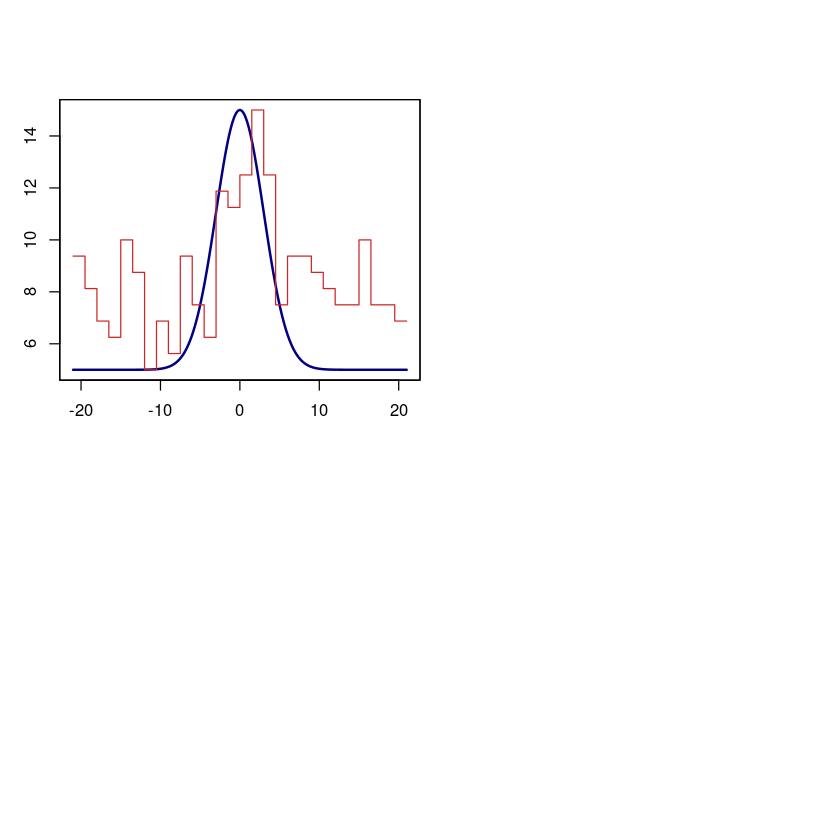

In [4]:
xplot <- list()
splot <- list()
xdat.off <- list()
i<-0
par(mfrow=c(2, 2), oma=c(1, 1, 1, 1), mar=c(2, 2, 4, 0))
for(j in 1:length(w1)){
i<-i+1
temp0<-array(unlist(xdat[(1+29*(j-1)):(29*j)]),dim=c(29))
temp=seq(from=min(temp0), to=max(temp0), by=0.05*w1[j])
    
xplot=c(xplot,temp)
temp1<-array(unlist(xplot[(1+length(temp)*(j-1)):(length(temp)*j)]),dim=c(length(temp)))
splot=c(splot,signal(temp1, A.true, B.true, x0, w1[j], Delta.t))   
temp2<-array(unlist(splot[(1+length(temp)*(j-1)):(length(temp)*j)]),dim=c(length(temp)))
plot(temp1,temp2,
     xlab="x", ylab="Signal+Background counts",
     type="l", col="navy", lwd=2)
xdat.off <- c(splot,signal(temp1, A.true, B.true, x0, w1[j], Delta.t))
par(new=TRUE)
plot(unlist(xdat[(1+29*(j-1)):(29*j)])-0.25,ddat[(1+29*(j-1)):(29*j)], type='s',col='firebrick3',
     xlab='', ylab='', xaxt="n", yaxt="n",
      ylim=range(c(temp2, ddat[(1+29*(j-1)):(29*j)])))
}